In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_score, recall_score, f1_score


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-students-dropout-and-academic-success/Predict Student Dropout and Academic Success.csv


**Reading Data**
=

In [2]:
df=pd.read_csv('/kaggle/input/predict-students-dropout-and-academic-success/Predict Student Dropout and Academic Success.csv',delimiter=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.isnull().sum()

print(df['Target'].value_counts())



Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [4]:
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

**Short EDA (Exploratory Data Analysis)**
=

In [5]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: title={'center': 'Correlation Map'}>

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


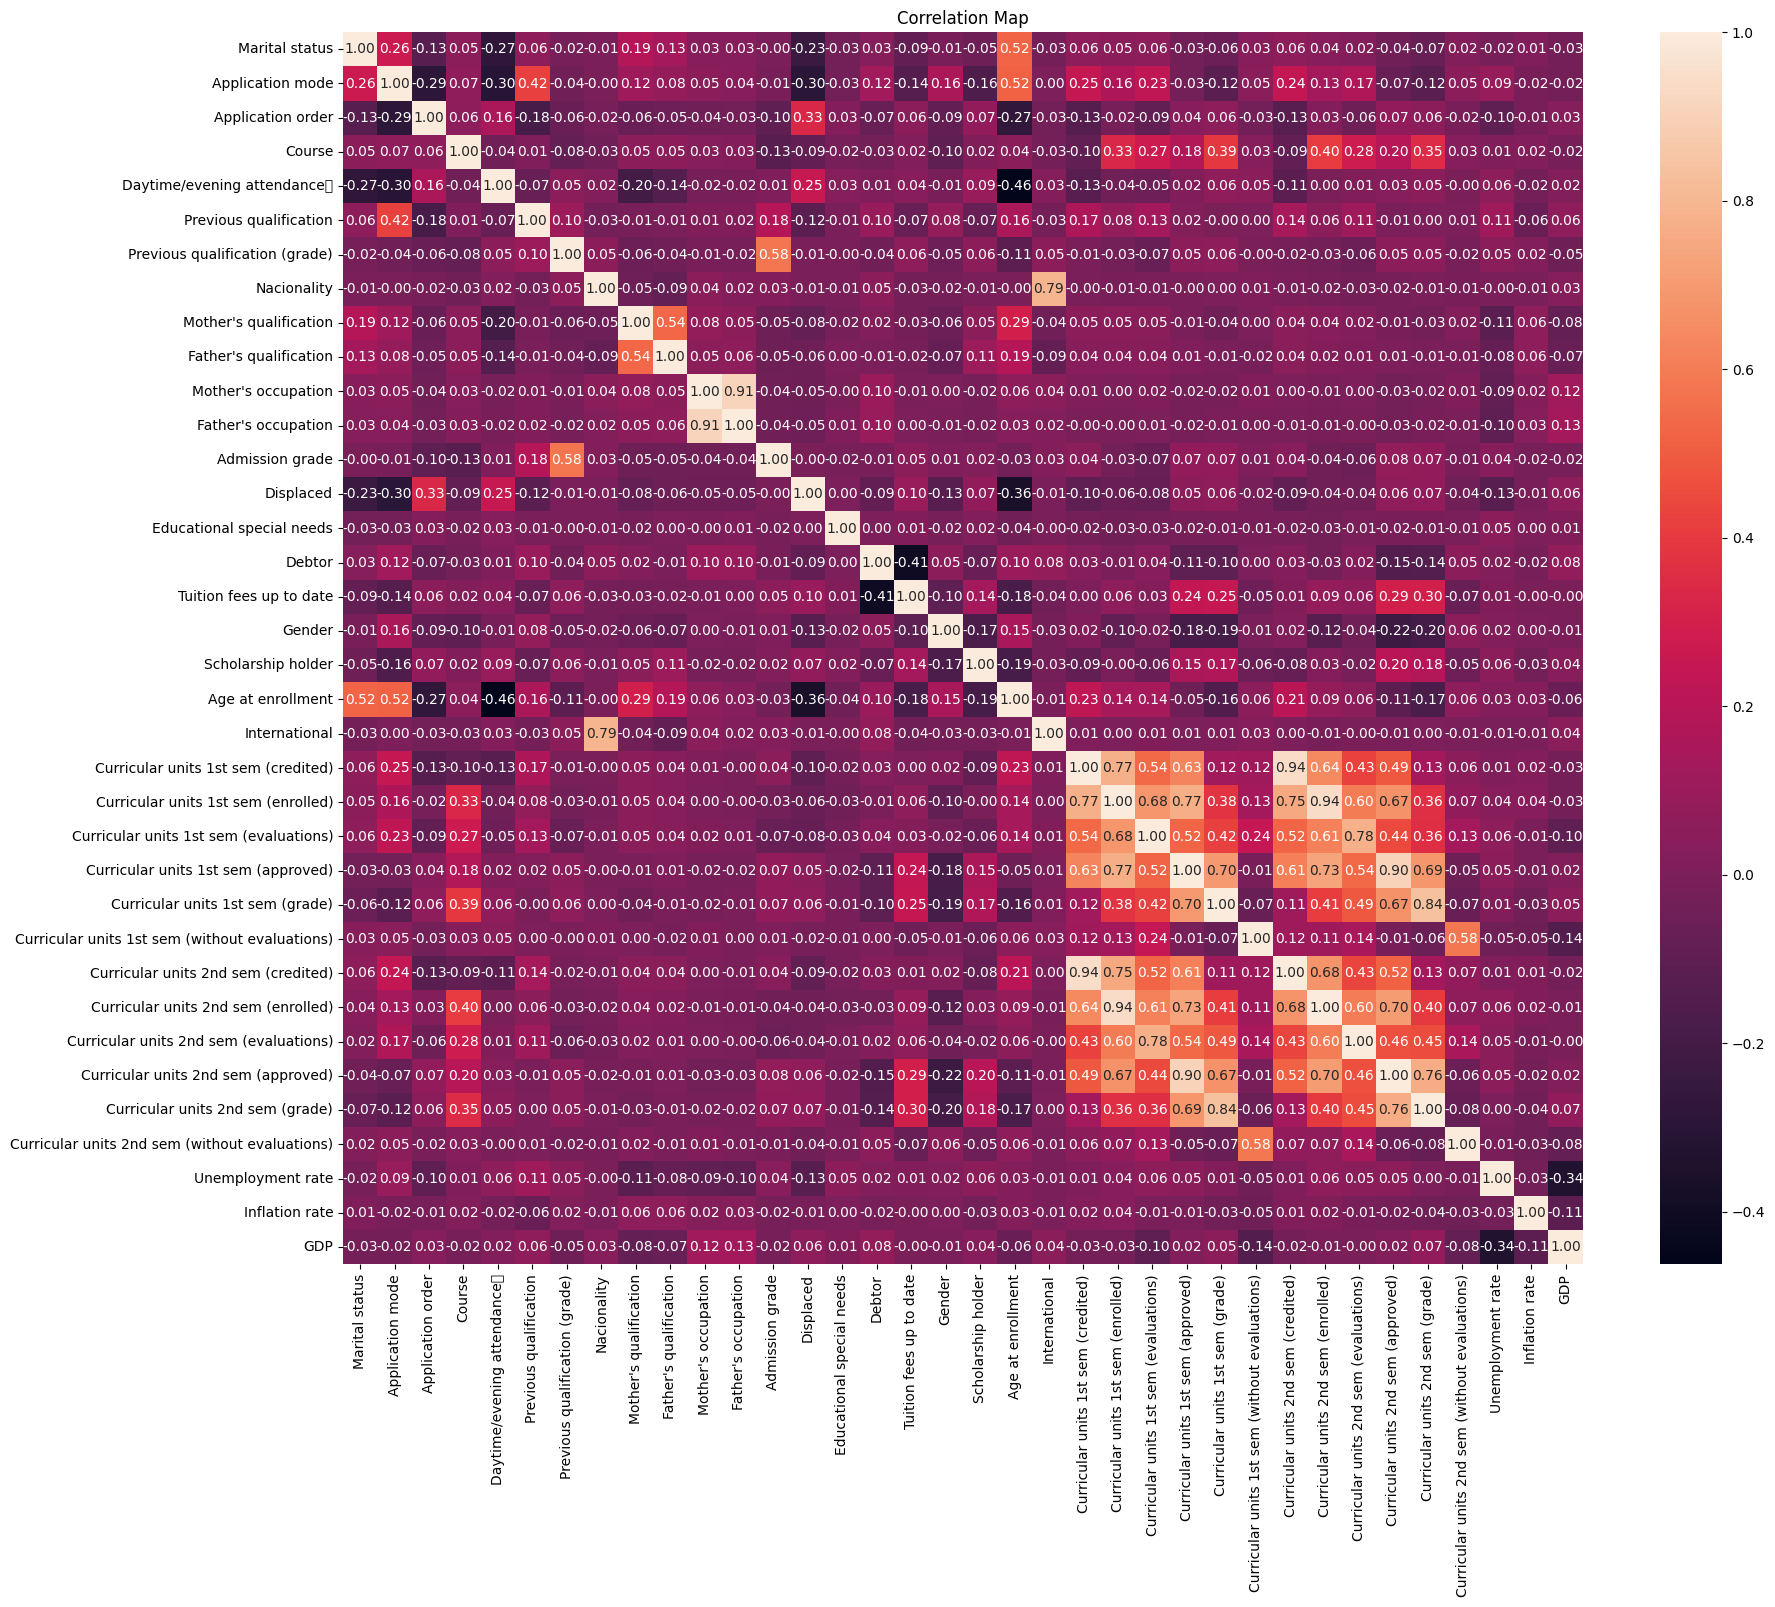

In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20,16))
plt.title("Correlation Map")
sns.heatmap(numeric_df.corr(),annot=True, fmt='.2f')

In [7]:
corr_matrix = numeric_df.corr()

# Step 2: Get the absolute correlation values
corr_abs = corr_matrix.abs()

# Step 3: Unstack the correlation matrix to easily sort it
corr_unstacked = corr_abs.unstack()

# Step 4: Sort the correlation values (ignoring self-correlations of 1)
sorted_corr = corr_unstacked.sort_values(ascending=False)

# Step 5: Filter out correlations of 1 (self-correlations)
strong_corr = sorted_corr[(sorted_corr < 1) & (sorted_corr > 0.7)]  # Example threshold of 0.7

# Display the strongest correlations
print("Strongest Correlations:\n", strong_corr)

Strongest Correlations:
 Curricular units 1st sem (credited)     Curricular units 2nd sem (credited)       0.944811
Curricular units 2nd sem (credited)     Curricular units 1st sem (credited)       0.944811
Curricular units 1st sem (enrolled)     Curricular units 2nd sem (enrolled)       0.942627
Curricular units 2nd sem (enrolled)     Curricular units 1st sem (enrolled)       0.942627
Father's occupation                     Mother's occupation                       0.910472
Mother's occupation                     Father's occupation                       0.910472
Curricular units 1st sem (approved)     Curricular units 2nd sem (approved)       0.904002
Curricular units 2nd sem (approved)     Curricular units 1st sem (approved)       0.904002
Curricular units 2nd sem (grade)        Curricular units 1st sem (grade)          0.837170
Curricular units 1st sem (grade)        Curricular units 2nd sem (grade)          0.837170
Nacionality                             International            

There is generally a strong positive correlation between student status in first semester compared to second semester, as well as grades in each semester.

In [8]:
print(df['Target'].unique())
print(df['Target'].value_counts())

['Dropout' 'Graduate' 'Enrolled']
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


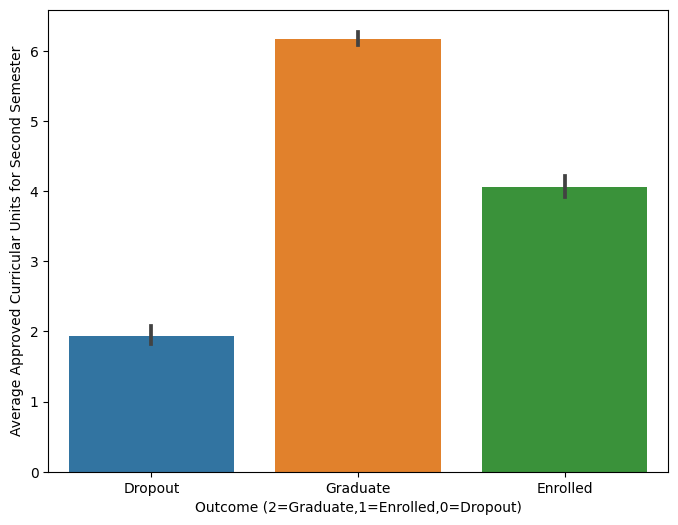

In [9]:
plt.figure(figsize=(8, 6))

sns.barplot(x='Target', y='Curricular units 2nd sem (approved)',data=df)

plt.xlabel('Outcome (2=Graduate,1=Enrolled,0=Dropout)')
plt.ylabel('Average Approved Curricular Units for Second Semester')


plt.show()

I saw a correlation coefficient of 0.6 between outcome and average approved curriculum units for second sem, so I thought it'd be interesting to see averages across each category even though the coefficient is a bit low.

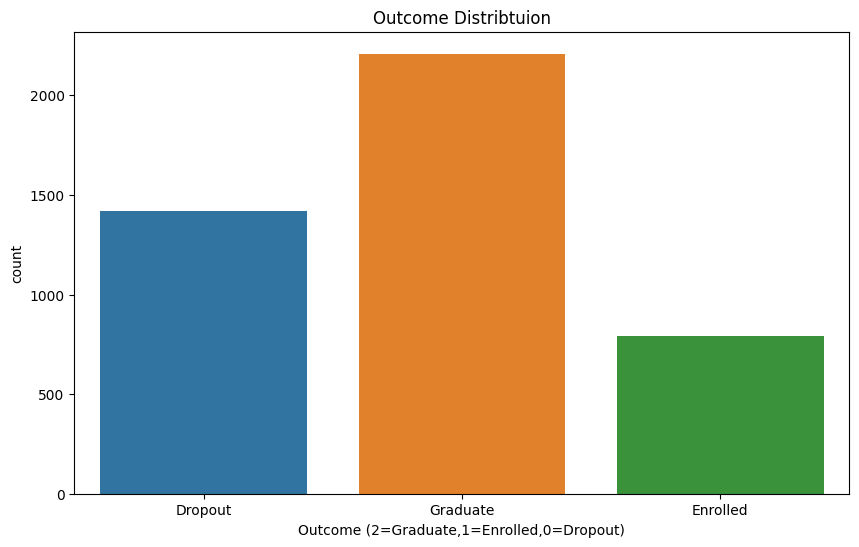

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Target")
plt.title('Outcome Distribtuion')
plt.xlabel('Outcome (2=Graduate,1=Enrolled,0=Dropout)')
plt.show()

**Processing the Data + Running Three Different Models**
=

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical columns to numeric format
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

X = df.drop(columns=['Target']) 
y = df['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [13]:
results=[]

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Collect performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Store results in a dictionary
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
results_df = pd.DataFrame(results)

# Display the DataFrame for comparison
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.670934   0.604569  0.539105  0.514234
1        Random Forest  0.765813   0.717297  0.670257  0.676709
2              XGBoost  0.772590   0.731504  0.701274  0.711072


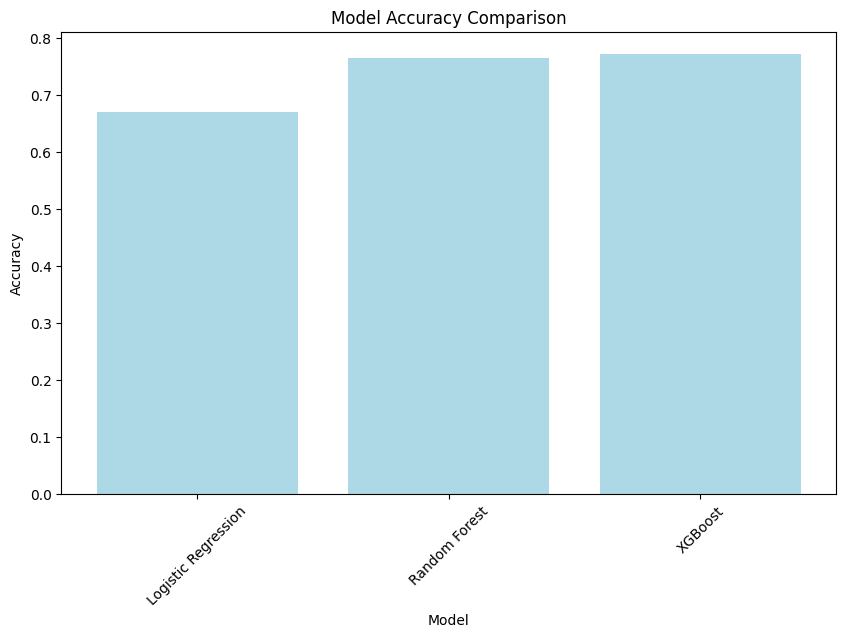

In [15]:
plt.figure(figsize=(10,6))

# Plot the Accuracy
plt.bar(results_df['Model'], results_df['Accuracy'], color='lightblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

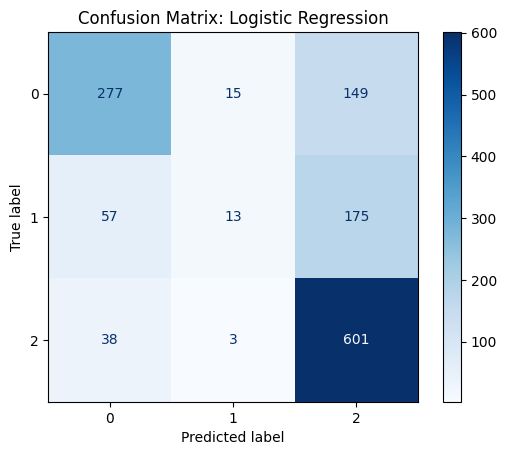

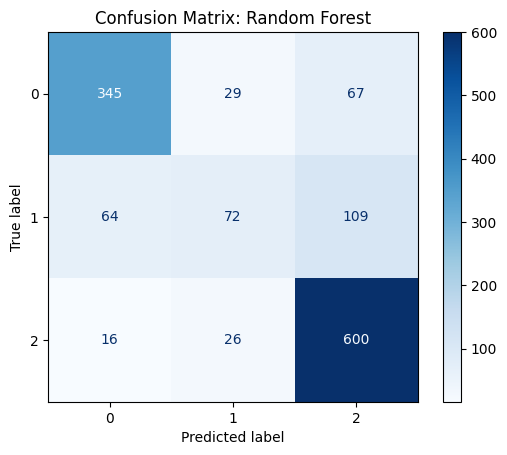

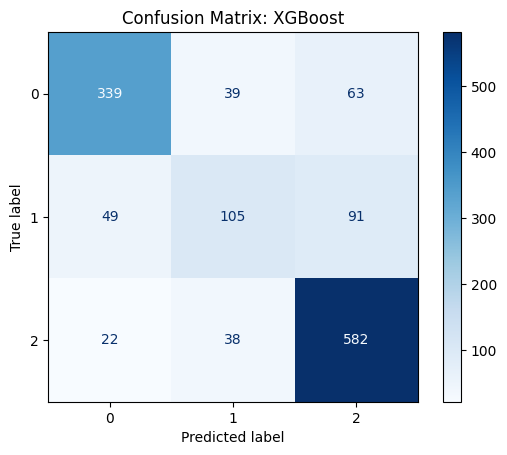

In [16]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

----

---

**Tuning the Random Forest Model Using Random Search**
=

In [17]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

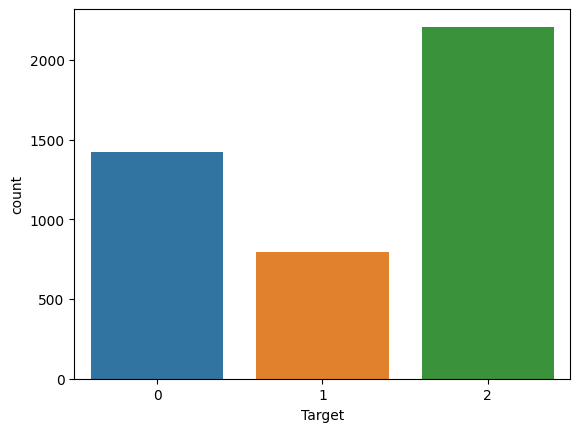

In [18]:
sns.countplot(data=df, x='Target')
plt.show()

In [19]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=42,class_weight='balanced') 

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)


# Fit the random search to the data
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estim

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [20]:
rfmodelforestrandom = random_search.best_estimator_

# Fit the model on the training data
rfmodelforestrandom.fit(X_train, y_train)

# Make predictions on the test data
ypredforestrandom = rfmodelforestrandom.predict(X_test)

In [21]:
print("Accuracy Score with Random Forest Random Search:", accuracy_score(y_test, ypredforestrandom))
print("\nRandom Forest Report (Random) :")
print(classification_report(y_test, ypredforestrandom))

Accuracy Score with Random Forest Random Search: 0.7740963855421686

Random Forest Report (Random) :
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       441
           1       0.60      0.34      0.44       245
           2       0.78      0.93      0.85       642

    accuracy                           0.77      1328
   macro avg       0.73      0.69      0.70      1328
weighted avg       0.76      0.77      0.76      1328



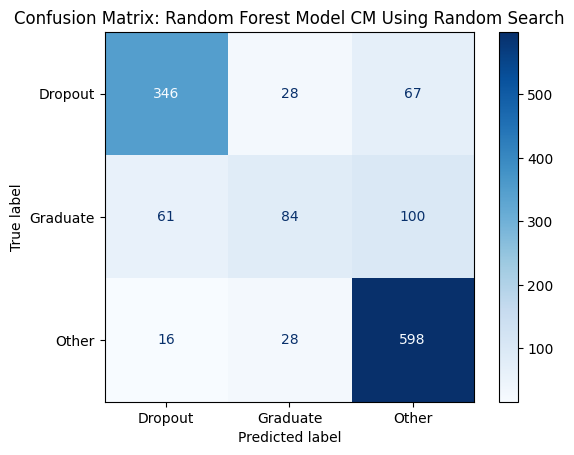

In [22]:
cm_forestrandom = confusion_matrix(y_test, ypredforestrandom)
disp_logistic3 = ConfusionMatrixDisplay(confusion_matrix=cm_forestrandom, display_labels=['Dropout', 'Graduate', 'Other'])
disp_logistic3.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Random Forest Model CM Using Random Search")
plt.show()

----

**Tuning the Random Forest Model Using Grid Search**
=

In [23]:
param_grid2 = {
    'n_estimators': [200, 300, 400],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Use GridSearchCV for more focused tuning
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid2, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 300, 400]},
             verbose=2)

In [24]:
rfmodelforestgrid = grid_search.best_estimator_
# Fit the model on the training data
rfmodelforestgrid.fit(X_train, y_train)

# Make predictions on the test data
ypredforestgrid = rfmodelforestgrid.predict(X_test)

In [25]:
print("Accuracy Score with Random Forest and Grid:", accuracy_score(y_test, ypredforestgrid))
print("\nRandom Forest (Grid) Report :")
print(classification_report(y_test, ypredforestgrid))

Accuracy Score with Random Forest and Grid: 0.7673192771084337

Random Forest (Grid) Report :
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       441
           1       0.55      0.41      0.47       245
           2       0.79      0.91      0.85       642

    accuracy                           0.77      1328
   macro avg       0.72      0.69      0.70      1328
weighted avg       0.76      0.77      0.76      1328



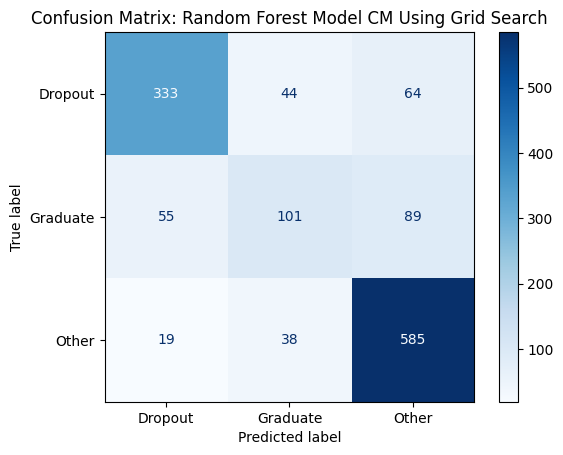

In [26]:
cm_forestgrid = confusion_matrix(y_test, ypredforestgrid)
disp_logistic3 = ConfusionMatrixDisplay(confusion_matrix=cm_forestgrid, display_labels=['Dropout', 'Graduate', 'Other'])
disp_logistic3.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Random Forest Model CM Using Grid Search")
plt.show()

**Tuning the XGB Model Using Random Search**
=

In [27]:
param_gridxgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}


rfxgb = RandomForestClassifier(random_state=42,class_weight='balanced') 

# Setup RandomizedSearchCV
random_search2 = RandomizedSearchCV(estimator=rfxgb, param_distributions=param_gridxgb, 
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=2)


# Fit the random search to the data
random_search2.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [28]:
rfmodelxgbrandom = random_search2.best_estimator_ 

# Fit the model on the training data
rfmodelxgbrandom.fit(X_train, y_train)

# Make predictions on the test data
ypredxgbrandom = rfmodelxgbrandom.predict(X_test)

In [29]:
print("Accuracy Score with XGB and Random:", accuracy_score(y_test, ypredxgbrandom))
print("\nXGB Report (Random Search)):")
print(classification_report(y_test, ypredxgbrandom))

Accuracy Score with XGB and Random: 0.7740963855421686

XGB Report (Random Search)):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       441
           1       0.60      0.34      0.44       245
           2       0.78      0.93      0.85       642

    accuracy                           0.77      1328
   macro avg       0.73      0.69      0.70      1328
weighted avg       0.76      0.77      0.76      1328



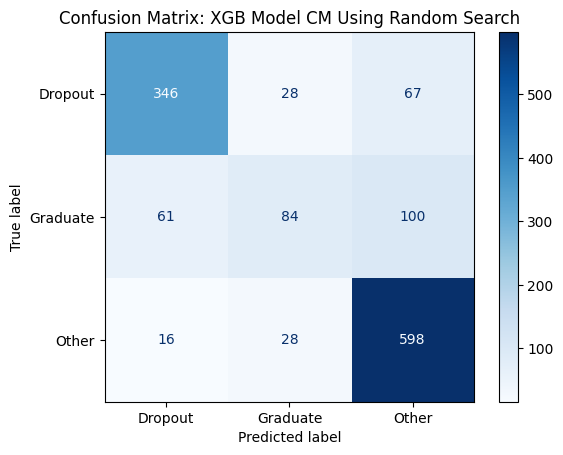

In [30]:
cm_xgbrandom = confusion_matrix(y_test, ypredxgbrandom)
disp_logistic3 = ConfusionMatrixDisplay(confusion_matrix=cm_xgbrandom, display_labels=['Dropout', 'Graduate', 'Other'])
disp_logistic3.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: XGB Model CM Using Random Search")
plt.show()

**Comparing the Tuned Models**
=

In [31]:
scores_xgb = cross_val_score(rfmodelxgbrandom, X, y, cv=5, scoring='accuracy')
print(f"XGBoost Random Search Cross-Validation Accuracy: {np.mean(scores_xgb)}")

scores_randomrandom = cross_val_score(rfmodelforestrandom, X, y, cv=5, scoring='accuracy')
print(f"Random Forest Random Search Cross-Validation Accuracy: {np.mean(scores_randomrandom)}")

scores_randomgrid = cross_val_score(rfmodelforestgrid, X, y, cv=5, scoring='accuracy')
print(f"Random Forest Grid Search Cross-Validation Accuracy: {np.mean(scores_randomgrid)}")

XGBoost Random Search Cross-Validation Accuracy: 0.7811915535444947
Random Forest Random Search Cross-Validation Accuracy: 0.7811915535444947
Random Forest Grid Search Cross-Validation Accuracy: 0.7787028657616893


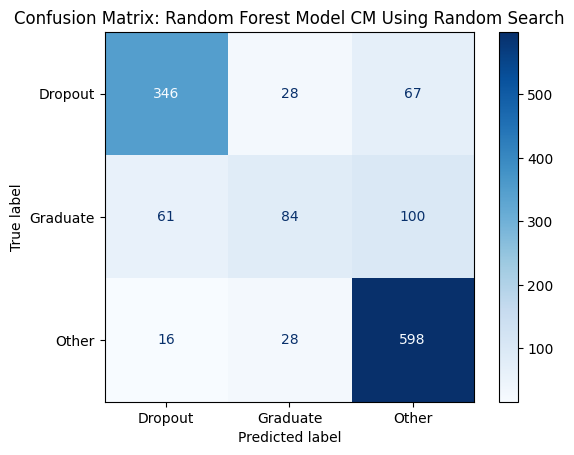

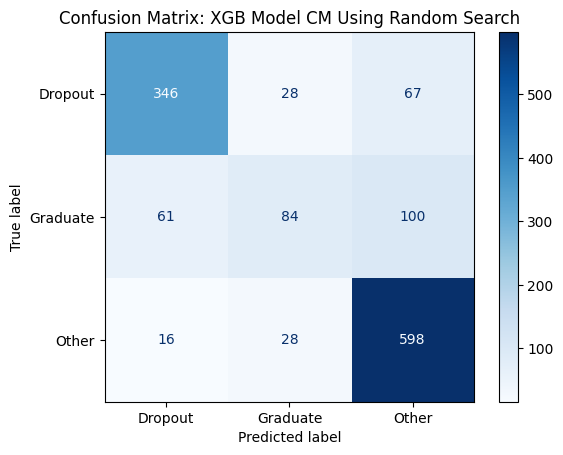

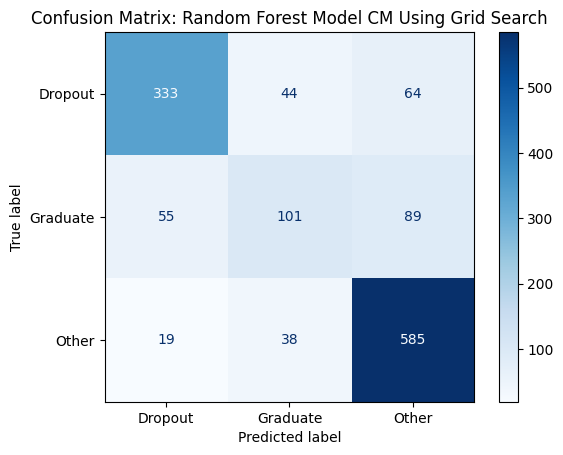

In [32]:
cm_forestrandom = confusion_matrix(y_test, ypredforestrandom)
disp_logistic1 = ConfusionMatrixDisplay(confusion_matrix=cm_forestrandom, display_labels=['Dropout', 'Graduate', 'Other'])
disp_logistic1.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Random Forest Model CM Using Random Search")
plt.show()

cm_xgbrandom = confusion_matrix(y_test, ypredxgbrandom)
disp_logistic2 = ConfusionMatrixDisplay(confusion_matrix=cm_xgbrandom, display_labels=['Dropout', 'Graduate', 'Other'])
disp_logistic2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: XGB Model CM Using Random Search")
plt.show()

cm_forestgrid = confusion_matrix(y_test, ypredforestgrid)
disp_logistic3 = ConfusionMatrixDisplay(confusion_matrix=cm_forestgrid, display_labels=['Dropout', 'Graduate', 'Other'])
disp_logistic3.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Random Forest Model CM Using Grid Search")
plt.show()



In [33]:
print("Accuracy Score with XGB and Random:", accuracy_score(y_test, ypredxgbrandom))
print("\nXGB Report (Random Search)):")
print(classification_report(y_test, ypredxgbrandom))

print("Accuracy Score with Random Forest and Grid:", accuracy_score(y_test, ypredforestgrid))
print("\nRandom Forest (Grid) Report :")
print(classification_report(y_test, ypredforestgrid))

print("Accuracy Score with Random Forest Random Search:", accuracy_score(y_test, ypredforestrandom))
print("\nRandom Forest Report (Random) :")
print(classification_report(y_test, ypredforestrandom))




Accuracy Score with XGB and Random: 0.7740963855421686

XGB Report (Random Search)):
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       441
           1       0.60      0.34      0.44       245
           2       0.78      0.93      0.85       642

    accuracy                           0.77      1328
   macro avg       0.73      0.69      0.70      1328
weighted avg       0.76      0.77      0.76      1328

Accuracy Score with Random Forest and Grid: 0.7673192771084337

Random Forest (Grid) Report :
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       441
           1       0.55      0.41      0.47       245
           2       0.79      0.91      0.85       642

    accuracy                           0.77      1328
   macro avg       0.72      0.69      0.70      1328
weighted avg       0.76      0.77      0.76      1328

Accuracy Score with Random Forest Random Search: 0.77409638

Based on these comparisons, the random search-tuned XGB model or the random search-tuned Random Forest Model are the best models for predicting a student's future based on demographic, academic, and social data.

A grid-search Random Forest model may also be useful as it's overall accuracy score + other metrics like f1 aren't too far off from the other two identical models (XGB and Random Forest in Random Search tuning).

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


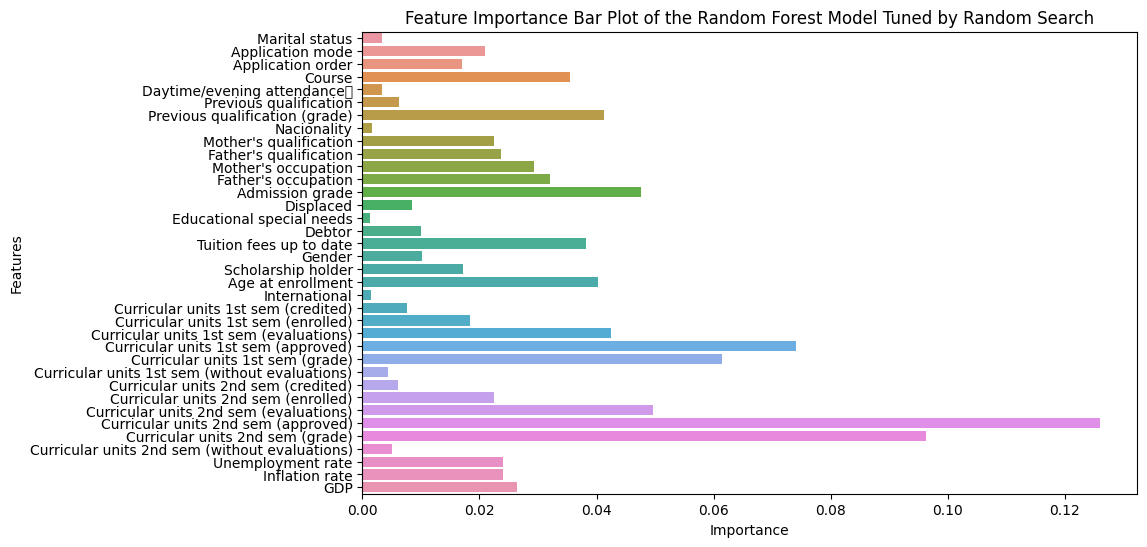

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


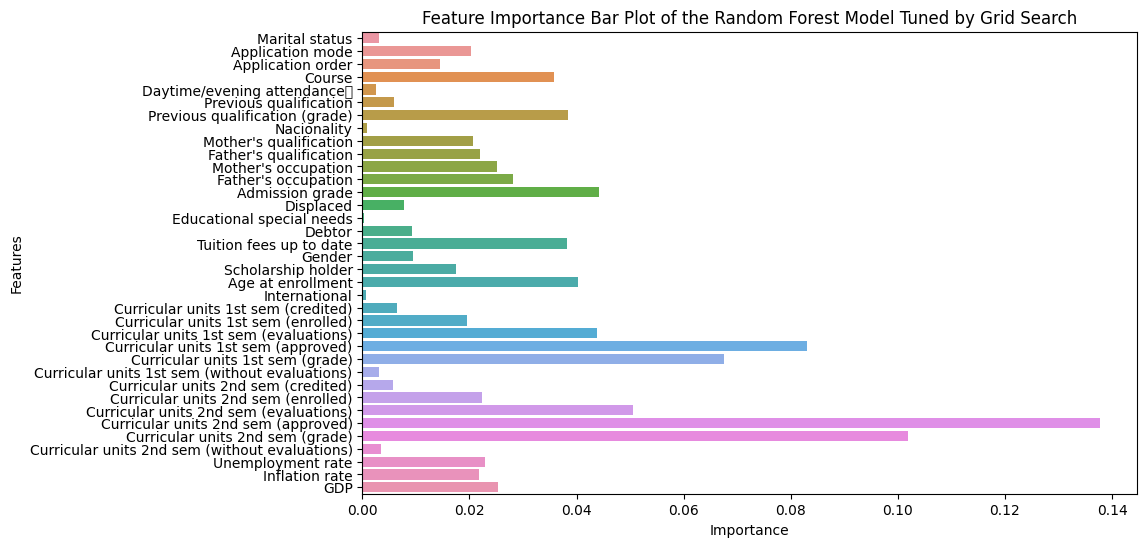

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


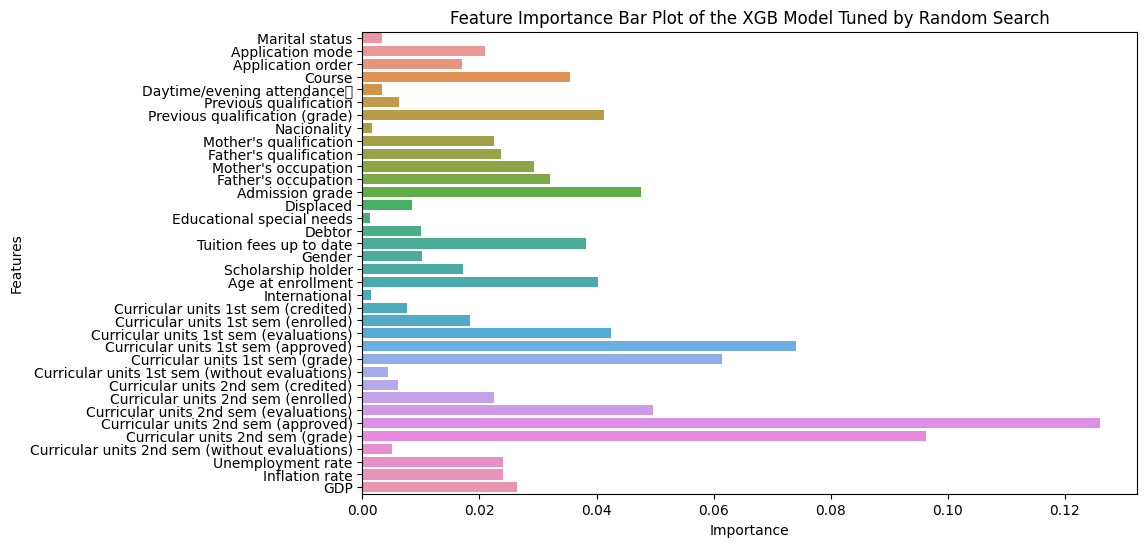

In [34]:
importancesA = rfmodelforestrandom.feature_importances_
featurenames = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importancesA, y=featurenames)
plt.title('Feature Importance Bar Plot of the Random Forest Model Tuned by Random Search')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

importancesB = rfmodelforestgrid.feature_importances_
featurenames = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importancesB, y=featurenames)
plt.title('Feature Importance Bar Plot of the Random Forest Model Tuned by Grid Search')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

importancesC = rfmodelxgbrandom.feature_importances_
featurenames = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importancesC, y=featurenames)
plt.title('Feature Importance Bar Plot of the XGB Model Tuned by Random Search')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

**Conclusion**
=

Thanks for taking a look at my notebook. This is my first time doing model tuning in Kaggle, and I'm constantly learning how to get more out of tuning. If you enjoyed this notebook too, I'd also appreciate an upvote.


**Thanks, and until next time!👋**

Note: I will also try to Grid Search-tune the XGB model in the near-future.